##Importing Necessary Libraries


In [ ]:
import pandas as pd # Pandas is a powerful library for data manipulation and analysis.
import seaborn as sns # Seaborn is a statistical data visualization library based on Matplotlib
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

##Loading the Dataset

In [ ]:
df= pd.read_csv("diabetes.csv")

##Getting the Glimpse of the Dataset

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Q 1) What is the distribution of age and BMI (Body Mass Index) among diabetic patients?

In [ ]:
# Filtering diabetic patients
diabetic_patients = df[df['Outcome'] == 1]

###To visualize the distribution of age and BMI among diabetic patients in the Diabetes dataset, we can use scatter plots or distribution plots. Let's create both types of plots and interpret the visualizations:

Scatter Plot:
We can create a scatter plot with age on the x-axis and BMI on the y-axis. Each point on the plot represents a diabetic patient, and the position of the point indicates the age and BMI of that patient.

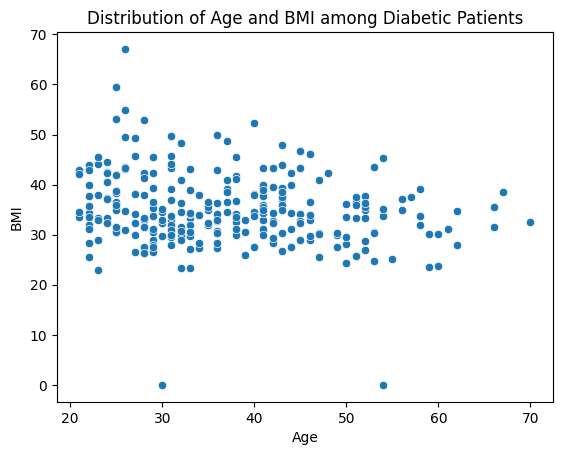

In [ ]:
# Creating a scatter plot
sns.scatterplot(x='Age', y='BMI', data=diabetic_patients)
plt.title('Distribution of Age and BMI among Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

##Interpretation:

###1) In the scatter plot, each point represents a diabetic patient.
###2) We can observe the distribution of diabetic patients across different age groups and BMI values.
###3) The scatter plot helps visualize any potential relationship between age and BMI among diabetic patients. For example, we can look for trends such as whether older patients tend to have higher BMIs.


##Distribution Plot:
We can also create separate distribution plots for age and BMI among diabetic patients to visualize their individual distributions.

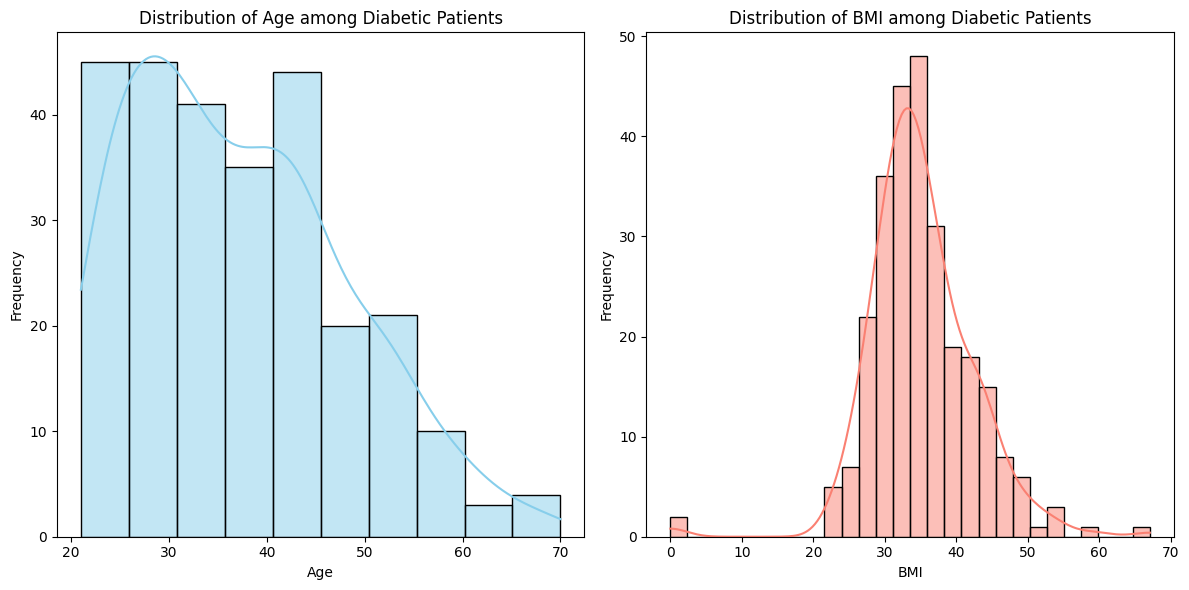

In [ ]:
# Creating distribution plots for age and BMI
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(diabetic_patients['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age among Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(diabetic_patients['BMI'], kde=True, color='salmon')
plt.title('Distribution of BMI among Diabetic Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##Interpretation:

###1) The left distribution plot shows the distribution of age among diabetic patients.
###2) The right distribution plot shows the distribution of BMI among diabetic patients.
###3) We can observe the spread and central tendency of age and BMI values among diabetic patients separately.

##Q 2) How do blood pressure levels vary across different age groups?

### To analyze how blood pressure levels vary across different age groups, we can use a combination of visualization techniques such as scatter plots and line plots.

### First, we need to group the data by age groups. We can define age groups, such as bins of 10 years, to categorize the data.

In [ ]:
# Group data by age groups (e.g., bins of 10 years)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

###For each age group, calculate the mean blood pressure level. This will give us an overview of the average blood pressure within each age category.

In [ ]:
# Calculating mean blood pressure for each age group
mean_bp_by_age = df.groupby('Age Group')['BloodPressure'].mean().reset_index()


##Visualize the Data:

Scatter Plot: Creating a scatter plot with age on the x-axis and blood pressure on the y-axis. Each point represents an individual's blood pressure level, and the scatter plot helps visualize the distribution of blood pressure across different age groups.

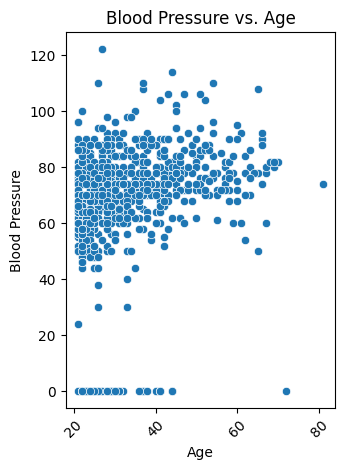

In [ ]:
# Scatter plot of blood pressure vs. age
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='BloodPressure', data=df)
plt.title('Blood Pressure vs. Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###Interpretation:

In the scatter plot, each point represents an individual's blood pressure level, allowing us to observe the distribution of blood pressure across different ages.

####Line Plot: Plotting the mean blood pressure for each age group on a line plot. This provides a clearer trend of how blood pressure levels change with age.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '(20, 30]'),
  Text(1, 0, '(30, 40]'),
  Text(2, 0, '(40, 50]'),
  Text(3, 0, '(50, 60]'),
  Text(4, 0, '(60, 70]'),
  Text(5, 0, '(70, 80]'),
  Text(6, 0, '(80, 90]')])

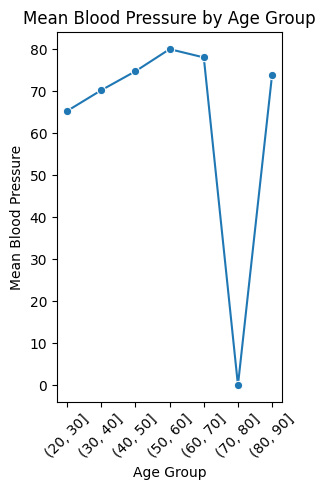

In [ ]:
# Converting 'Age Group' to strings
mean_bp_by_age['Age Group'] = mean_bp_by_age['Age Group'].astype(str)

# Line plot of mean blood pressure by age group
plt.subplot(1, 2, 2)
sns.lineplot(x='Age Group', y='BloodPressure', data=mean_bp_by_age, marker='o')
plt.title('Mean Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Blood Pressure')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


###Interpretation:

The line plot shows the trend of mean blood pressure levels across age groups. We can see how average blood pressure changes as individuals age.

##Q 3) Is there a correlation between BMI and Glucose levels?

###To determine if there's a correlation between BMI (Body Mass Index) and Glucose levels, we can use a scatter plot to visualize the relationship between these two variables. Additionally, we can calculate the correlation coefficient to quantify the strength and direction of the correlation.

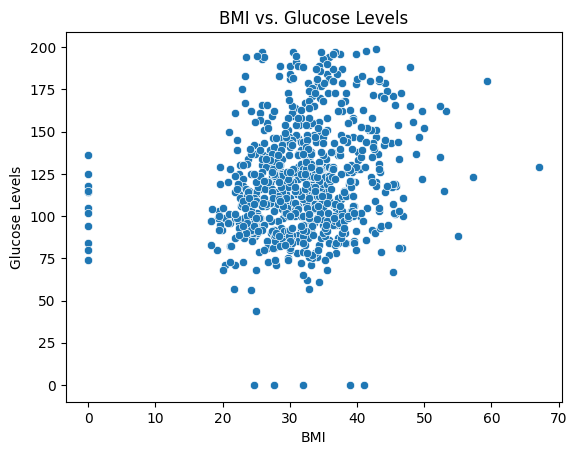

Correlation coefficient between BMI and Glucose levels: 0.22107106945898294


In [ ]:
# Create a scatter plot of BMI vs. Glucose levels
sns.scatterplot(x='BMI', y='Glucose', data= df)
plt.title('BMI vs. Glucose Levels')
plt.xlabel('BMI')
plt.ylabel('Glucose Levels')
plt.show()

# Calculate the correlation coefficient
correlation = df['BMI'].corr(df['Glucose'])
print("Correlation coefficient between BMI and Glucose levels:", correlation)


##Interpretation:

###1) The scatter plot visualizes the relationship between BMI and Glucose levels. Each point represents an individual's BMI and corresponding Glucose level.
###2) If the points on the scatter plot exhibit a clear pattern (e.g., forming a line), it suggests a correlation between the two variables.

##Joint Plot:
A joint plot combines scatter plots for the individual variables with histograms or density plots along the axes. This allows you to visualize the relationship between BMI and Glucose levels, as well as the distributions of each variable.

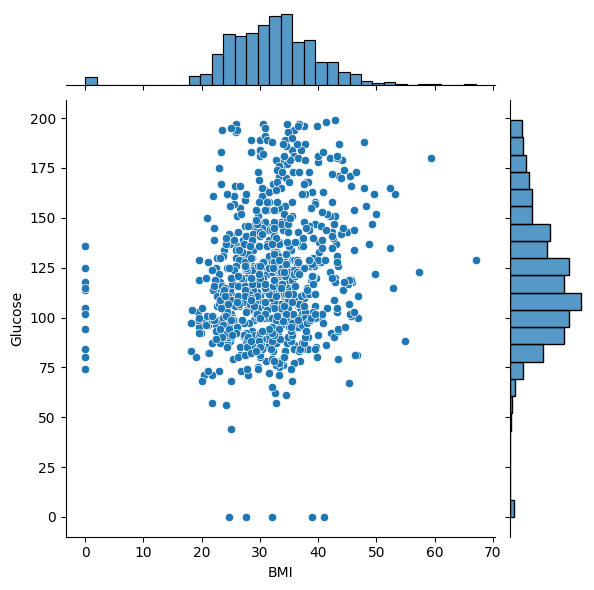

In [ ]:
sns.jointplot(x='BMI', y='Glucose', data=df, kind='scatter')


##Hexbin Plot:
A hexbin plot is similar to a scatter plot but is particularly useful when dealing with a large number of data points. It bins the data into hexagonal bins and represents the density of points within each bin using color intensity.

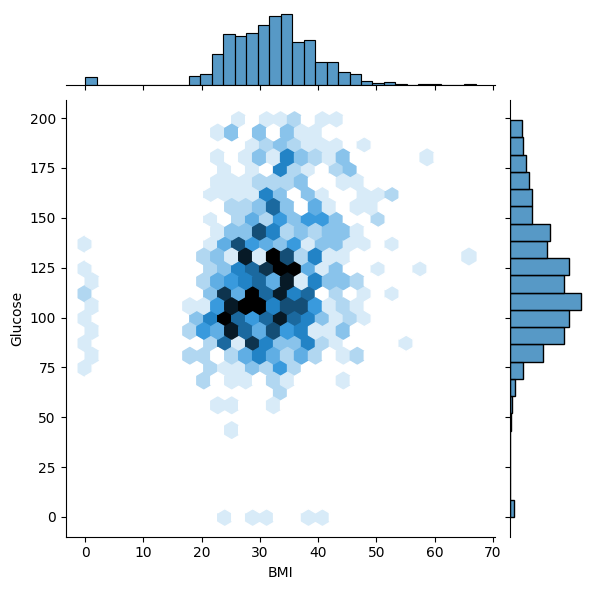

In [ ]:
sns.jointplot(x='BMI', y='Glucose', data= df, kind='hex')


##Q 4) Are there any observable patterns in the relationship between diabetes progression and patient age?

###To explore the relationship between diabetes progression and patient age, we can use a few different visualization techniques to identify observable patterns.

###Scatter Plot:
We can create a scatter plot with age on the x-axis and diabetes progression (e.g., measured by the 'DiabetesPedigreeFunction') on the y-axis. Each point on the plot represents a patient's age and corresponding diabetes progression value.

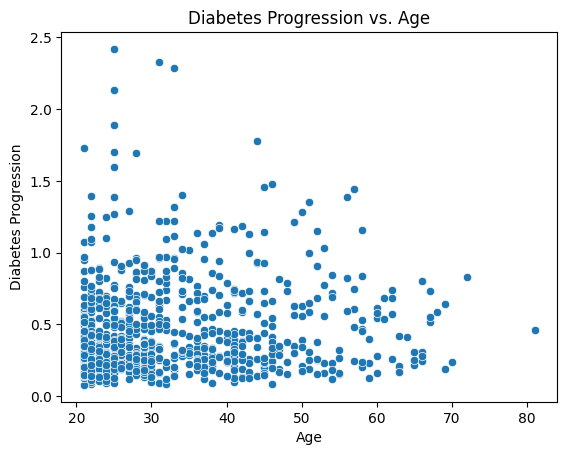

In [ ]:
sns.scatterplot(x='Age', y='DiabetesPedigreeFunction', data=df)
plt.title('Diabetes Progression vs. Age')
plt.xlabel('Age')
plt.ylabel('Diabetes Progression')
plt.show()


##Line Plot:
line plot is to use a line plot to visualize how diabetes progression changes with age. We can calculate the mean diabetes progression for each age group and plot it against the age.

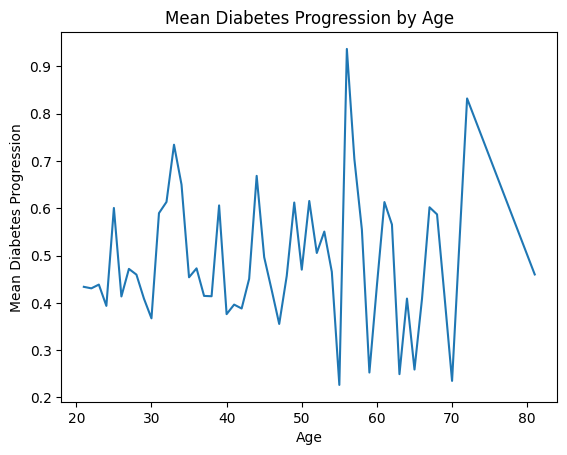

In [ ]:
mean_progression_by_age = df.groupby('Age')['DiabetesPedigreeFunction'].mean().reset_index()
sns.lineplot(x='Age', y='DiabetesPedigreeFunction', data=mean_progression_by_age)
plt.title('Mean Diabetes Progression by Age')
plt.xlabel('Age')
plt.ylabel('Mean Diabetes Progression')
plt.show()


##Q5) How do insulin levels vary across different age groups?

###To explore how insulin levels vary across different age groups, we can use a combination of visualization techniques similar to those used to analyze blood pressure levels across age groups.

###Group Data by Age: First, we need to group the data by age groups, similar to how we did for blood pressure levels.

In [ ]:
# Group data by age groups (e.g., bins of 10 years)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

###For each age group, calculate the mean insulin level. This will give us an overview of the average insulin level within each age category.

In [ ]:
# Calculate mean insulin levels for each age group
mean_insulin_by_age = df.groupby('Age Group')['Insulin'].mean().reset_index()


Text(0, 0.5, 'Insulin Levels')

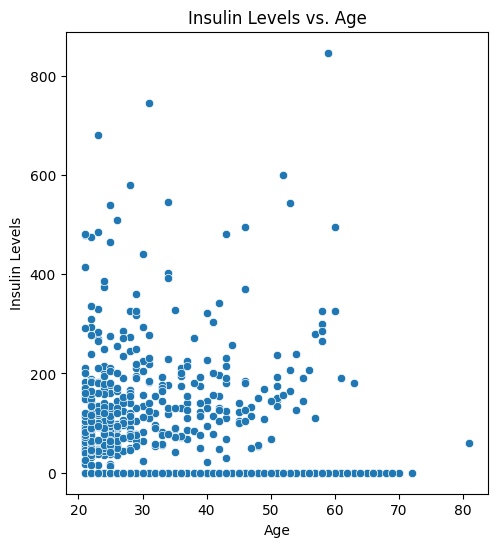

In [ ]:
# Visualize the data
plt.figure(figsize=(12, 6))

# Scatter plot of insulin levels vs. age
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Insulin', data=df)
plt.title('Insulin Levels vs. Age')
plt.xlabel('Age')
# Converting 'Age Group' to strings
# Converting 'Age Group' to strings
mean_bp_by_age['Age Group'] = mean_bp_by_age['Age Group'].astype(str)

# Line plot of mean blood pressure by age group
plt.subplot(1, 2, 2)
sns.lineplot(x='Age Group', y='BloodPressure', data=mean_bp_by_age, marker='o')
plt.title('Mean Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Blood Pressure')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readabilitymean_bp_by_age['Age Group'] = mean_bp_by_age['Age Group'].astype(str)plt.ylabel('Insulin Levels')

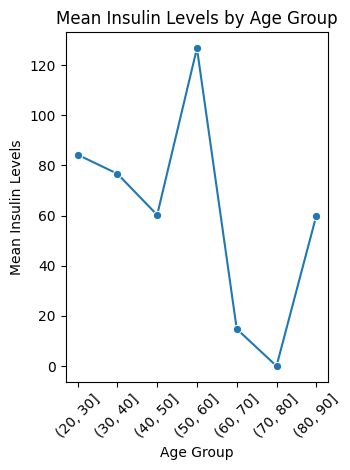

In [ ]:
# Convert 'Age Group' to strings
mean_insulin_by_age['Age Group'] = mean_insulin_by_age['Age Group'].astype(str)

# Line plot of mean insulin levels by age group
plt.subplot(1, 2, 2)
sns.lineplot(x='Age Group', y='Insulin', data=mean_insulin_by_age, marker='o')
plt.title('Mean Insulin Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Insulin Levels')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
